In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [33]:
data =  pd.read_csv('./spotify_songs.csv')
data =  pd.read_csv('./out (2).csv')
data.shape

(8164, 15)

In [34]:
latex_table = data.head().to_latex(index=False)
latex_table

'\\begin{tabular}{llrrrrrrrrrrrrl}\n\\toprule\nName & ID & acousticness & danceability & energy & instrumentalness & key & liveness & loudness & mode & speechiness & tempo & time_signature & valence & genre \\\\\n\\midrule\nR e a l W o m a n & 5bhDnM1VMFDTs3urFBq4Na & 0.554000 & 0.680000 & 0.613000 & 0.000013 & 6.000000 & 0.085000 & -7.506000 & 1.000000 & 0.054400 & 89.942000 & 4.000000 & 0.140000 & rnb \\\\\nSaturn & 1bjeWoagtHmUKputLVyDxQ & 0.620000 & 0.411000 & 0.619000 & 0.000000 & 1.000000 & 0.110000 & -6.834000 & 1.000000 & 0.036800 & 177.937000 & 4.000000 & 0.337000 & rnb \\\\\nact ii: date @ 8 (feat. Drake) - remix & 3QS9ZCtoSCJhmaJ7QNXSAS & 0.318000 & 0.550000 & 0.545000 & 0.000000 & 0.000000 & 0.060800 & -9.304000 & 1.000000 & 0.163000 & 102.469000 & 4.000000 & 0.412000 & rnb \\\\\nMade For Me & 0WIv5qV41y6YjjB9V1biuC & 0.137000 & 0.785000 & 0.470000 & 0.000001 & 7.000000 & 0.131000 & -6.420000 & 0.000000 & 0.032900 & 120.006000 & 4.000000 & 0.056900 & rnb \\\\\nBest Time & 1

In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
acousticness,4891.0,0.208274,0.232844,0.000001,0.02360,0.116000,0.32900,0.985
danceability,4891.0,0.638961,0.138627,0.075500,0.54950,0.640000,0.73800,0.976
energy,4891.0,0.674033,0.186916,0.056800,0.54300,0.685000,0.82400,0.997
instrumentalness,4891.0,0.086006,0.226150,0.000000,0.00000,0.000014,0.00468,0.982
key,4891.0,5.443877,3.600424,0.000000,2.00000,6.000000,9.00000,11.000
liveness,4891.0,0.178844,0.134838,0.010000,0.09755,0.125000,0.22100,0.981
loudness,4891.0,-7.057901,2.813045,-22.320000,-8.47150,-6.555000,-5.14350,0.642
mode,4891.0,0.594561,0.491027,0.000000,0.00000,1.000000,1.00000,1.000
speechiness,4891.0,0.101633,0.104243,0.022700,0.03610,0.053000,0.12200,0.855
tempo,4891.0,122.857395,27.969448,48.718000,99.96800,124.029000,139.98750,209.929


In [4]:
data.isna().sum().sort_values(ascending=False)

Name                0
ID                  0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
genre               0
dtype: int64

# Data Cleaning


In [35]:
data.dropna(inplace=True)
data.isna().sum().sum()


0

In [6]:
data['track_album_release_date'].value_counts()


KeyError: 'track_album_release_date'

In [ ]:
data['album_release_year'] = pd.DatetimeIndex(data['track_album_release_date']).year

In [ ]:
print("Total Artists :", data['track_artist'].nunique())
print("Total Genres :", data['playlist_genre'].nunique())
print("Total Sous Genres :", data['playlist_subgenre'].nunique())

Total Artists : 10692
Total Genres : 6
Total Sous Genres : 24


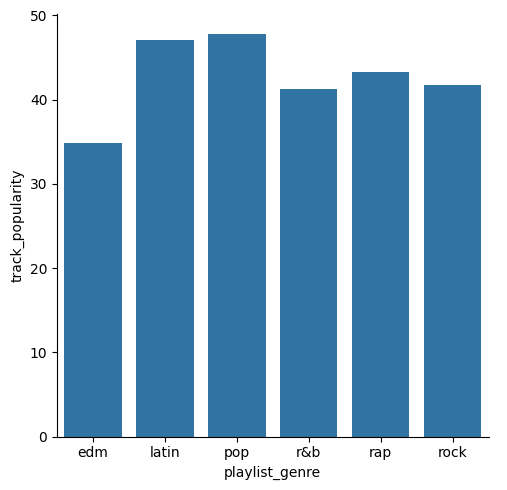

In [ ]:
sns.catplot(data=data.groupby('playlist_genre')['track_popularity'].mean().reset_index(), x="playlist_genre" , y="track_popularity",kind="bar")

# Data For ML

## Logistic Regression

In [ ]:
df =  pd.read_csv('./spotify_songs.csv')
columns_to_drop = ['track_id','track_name','track_artist', 'track_album_id', 'track_album_name', 'track_album_release_date', 'playlist_name', 'playlist_id', 'playlist_subgenre', 'duration_ms']
df.drop(columns= columns_to_drop, inplace=True)


In [36]:
df = data.copy()
df.drop(columns=["Name","ID"],inplace=True)

In [37]:
df

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,genre
0,0.5540,0.680,0.613,0.000013,6.0,0.0850,-7.506,1.0,0.0544,89.942,4.0,0.1400,rnb
1,0.6200,0.411,0.619,0.000000,1.0,0.1100,-6.834,1.0,0.0368,177.937,4.0,0.3370,rnb
2,0.3180,0.550,0.545,0.000000,0.0,0.0608,-9.304,1.0,0.1630,102.469,4.0,0.4120,rnb
3,0.1370,0.785,0.470,0.000001,7.0,0.1310,-6.420,0.0,0.0329,120.006,4.0,0.0569,rnb
4,0.2010,0.806,0.342,0.017600,9.0,0.0758,-7.503,1.0,0.0750,92.985,4.0,0.9370,rnb
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8159,0.9130,0.341,0.169,0.000058,2.0,0.0829,-12.189,1.0,0.0419,181.507,4.0,0.3210,country
8160,0.0249,0.478,0.776,0.000238,6.0,0.0683,-2.640,1.0,0.0346,112.040,4.0,0.3670,country
8161,0.5870,0.583,0.536,0.000000,1.0,0.3800,-5.601,1.0,0.0400,93.488,4.0,0.7100,country
8162,0.6780,0.747,0.561,0.000380,0.0,0.0670,-10.497,1.0,0.0502,115.751,4.0,0.6930,country


In [38]:
from sklearn.preprocessing import OneHotEncoder

## Encodage des features 
onehot_encoder = OneHotEncoder(sparse_output=False)  # Setting sparse=False to get a dense array 
features_to_encode = df[['key', 'mode']]
features_encoded = onehot_encoder.fit_transform(features_to_encode)

columns_encoded = onehot_encoder.get_feature_names_out(['key', 'mode'])

encoded_df = pd.DataFrame(features_encoded, columns=columns_encoded)

 # Drop the original 'key' and 'mode' columns from df 
df.drop(['key', 'mode'], axis=1, inplace=True)

 # Concatenate the encoded DataFrame with df 
df = pd.concat([df, encoded_df], axis=1)


In [39]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

# Separate features and target variable
X = df.drop('genre', axis=1)
y = df['genre']

# Label encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Get columns to scale (except 'key' and 'mode')
cols_to_scale = X.columns.difference(['key', 'mode'])

# Scale the selected columns using Min-Max scaler
min_max_scaler = preprocessing.MinMaxScaler()
X[cols_to_scale] = min_max_scaler.fit_transform(X[cols_to_scale])
X.head()


,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence,...,key_4.0,key_5.0,key_6.0,key_7.0,key_8.0,key_9.0,key_10.0,key_11.0,mode_0.0,mode_1.0
0,0.562436,0.666116,0.605317,0.000013,0.077002,0.648419,0.038549,0.255694,0.75,0.119155,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.629441,0.369697,0.611452,0.000000,0.102669,0.674235,0.017413,0.801487,0.75,0.325243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.322842,0.522865,0.535787,0.000000,0.052156,0.579348,0.168968,0.333393,0.75,0.403703,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.139085,0.781818,0.459100,0.000001,0.124230,0.690139,0.012730,0.442167,0.75,0.032221,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.204060,0.804959,0.328221,0.017868,0.067556,0.648534,0.063288,0.274568,0.75,0.952924,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [40]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.ensemble import IsolationForest

# Define the different scalers
scalers = {
    'MinMaxScaler': MinMaxScaler(),
    'StandardScaler': StandardScaler(),
    'RobustScaler': RobustScaler()
}

# Define the different feature selectors
selectors = {
    'SelectKBest_5': SelectKBest(score_func=f_regression, k=5),
    'SelectKBest_7': SelectKBest(score_func=f_regression, k=7),
    'SelectKBest_10': SelectKBest(score_func=f_regression, k=10)
}

# Define the different contamination levels for outlier removal
contamination_levels = [0.1, 0.2, 0.3, 0.4, 0.5]

max_accuracy = 0.0
best_params = {}

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2015)

for scaler_name, scaler in scalers.items():
    for selector_name, selector in selectors.items():
        for contamination in contamination_levels:
            # Apply scaler to the data
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)

            # Apply feature selector to the scaled data
            X_train_selected = selector.fit_transform(X_train_scaled, y_train)
            X_test_selected = selector.transform(X_test_scaled)

            # Outlier detection and removal
            outlier_detector = IsolationForest(contamination=contamination)
            outlier_mask = outlier_detector.fit_predict(X_train_selected)
            X_train_filtered = X_train_selected[outlier_mask == 1]
            y_train_filtered = y_train[outlier_mask == 1]

            # Define logistic regression model
            logistic_regression = LogisticRegression(max_iter=1000, solver='liblinear')

            # Define hyperparameters grid for OneVsRestClassifier and OneVsOneClassifier
            param_grid = {}

            # Perform grid search for OneVsRestClassifier
            ovr_grid_search = GridSearchCV(OneVsRestClassifier(logistic_regression), param_grid, cv=3)
            ovr_grid_search.fit(X_train_filtered, y_train_filtered)

            # Perform grid search for OneVsOneClassifier
            ovo_grid_search = GridSearchCV(OneVsOneClassifier(logistic_regression), param_grid, cv=3)
            ovo_grid_search.fit(X_train_filtered, y_train_filtered)

            # Make predictions using the best models found by grid search
            y_pred_ovr = ovr_grid_search.best_estimator_.predict(X_test_selected)
            y_pred_ovo = ovo_grid_search.best_estimator_.predict(X_test_selected)

            # Calculate accuracy
            accuracy_ovr = accuracy_score(y_test, y_pred_ovr)
            accuracy_ovo = accuracy_score(y_test, y_pred_ovo)

            if accuracy_ovr > max_accuracy:
                max_accuracy = accuracy_ovr
                best_params = {
                    'Scaler': scaler_name,
                    'Selector': selector_name,
                    'Contamination': contamination,
                    'Accuracy (OneVsRestClassifier)': accuracy_ovr,
                    'Best parameters for OneVsRestClassifier': ovr_grid_search.best_params_
                }

            if accuracy_ovo > max_accuracy:
                max_accuracy = accuracy_ovo
                best_params = {
                    'Scaler': scaler_name,
                    'Selector': selector_name,
                    'Contamination': contamination,
                    'Accuracy (OneVsOneClassifier)': accuracy_ovo,
                    'Best parameters for OneVsOneClassifier': ovo_grid_search.best_params_
                }

print("Max Accuracy:", max_accuracy)
print("Best Parameters:")
for key, value in best_params.items():
    print(f"{key}: {value}")


Max Accuracy: 0.6135946111451317
Best Parameters:
Scaler: RobustScaler
Selector: SelectKBest_10
Contamination: 0.1
Accuracy (OneVsOneClassifier): 0.6135946111451317
Best parameters for OneVsOneClassifier: {}


## Some Optimization

### Using Release_Year

In [ ]:
df =  pd.read_csv('./spotify_songs.csv')
columns_to_drop = ['track_popularity','track_id','track_name','track_artist', 'track_album_id', 'track_album_name', 'playlist_name', 'playlist_id', 'playlist_subgenre', 'duration_ms']
df.drop(columns= columns_to_drop, inplace=True)
df.head()

,track_album_release_date,playlist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,2019-06-14,pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036
1,2019-12-13,pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972
2,2019-07-05,pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008
3,2019-07-19,pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956
4,2019-03-05,pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976


In [ ]:
df['track_album_release_date'] = pd.DatetimeIndex(df['track_album_release_date']).year

In [ ]:
df.head()

,track_album_release_date,playlist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,2019,pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036
1,2019,pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972
2,2019,pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008
3,2019,pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956
4,2019,pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976


In [ ]:
range = df['track_album_release_date'].max() -  df['track_album_release_date'].min()
df['track_album_release_date'].max(), df['track_album_release_date'].min(), range


(2020, 1957, 63)

In [ ]:
year_map = {1: (1957, 1970), 2: (1971, 1980), 3: (1981, 1990),
            4: (1991, 2000), 5: (2001, 2010), 6: (2011, 2020)}

df['period'] = pd.cut(df['track_album_release_date'], bins=[1956, 1970, 1980, 1990, 2000, 2010, 2020], 
       labels=year_map.keys(), include_lowest=True)

df.head()

,track_album_release_date,playlist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,period
0,2019,pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,6
1,2019,pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,6
2,2019,pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,6
3,2019,pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,6
4,2019,pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,6


In [ ]:
df.drop(columns= ['track_album_release_date'], inplace=True)
df.head()

,playlist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,period
0,pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,6
1,pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,6
2,pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,6
3,pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,6
4,pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,6


In [ ]:
df.groupby('period')['playlist_genre'].value_counts()

C:\Users\omar7\AppData\Local\Temp\ipykernel_28000\176859134.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('period')['playlist_genre'].value_counts()


period  playlist_genre
1       rock               215
        r&b                 33
        rap                  6
        pop                  2
        latin                1
        edm                  0
2       rock               883
        r&b                 59
        pop                 23
        rap                  7
        edm                  5
        latin                4
3       rock               814
        r&b                285
        pop                130
        latin               73
        rap                 73
        edm                  5
4       r&b                816
        rap                691
        rock               598
        latin              154
        pop                117
        edm                 13
5       rock              1066
        r&b                957
        rap                823
        latin              793
        pop                610
        edm                193
6       edm               5827
        pop     

In [ ]:
from sklearn.preprocessing import OneHotEncoder

## Encodage des features 
onehot_encoder = OneHotEncoder(sparse_output=False)  # Setting sparse=False to get a dense array 
features_to_encode = df[['key', 'mode']]
features_encoded = onehot_encoder.fit_transform(features_to_encode)

columns_encoded = onehot_encoder.get_feature_names_out(['key', 'mode'])

encoded_df = pd.DataFrame(features_encoded, columns=columns_encoded)

 # Drop the original 'key' and 'mode' columns from df 
df.drop(['key', 'mode'], axis=1, inplace=True)

 # Concatenate the encoded DataFrame with df 
df = pd.concat([df, encoded_df], axis=1)


In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

# Separate features and target variable
X = df.drop('playlist_genre', axis=1)
y = df['playlist_genre']

# Label encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Get columns to scale (except 'key' and 'mode')
cols_to_scale = X.columns.difference(['key', 'mode'])

# Scale the selected columns using Min-Max scaler
min_max_scaler = preprocessing.MinMaxScaler()
X[cols_to_scale] = min_max_scaler.fit_transform(X[cols_to_scale])
X.head()


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,period,...,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_0,mode_1
0,0.760936,0.915985,0.918090,0.063508,0.102616,0.000000,0.065562,0.522704,0.509673,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.738555,0.814968,0.869162,0.040632,0.072837,0.004235,0.358434,0.699294,0.417524,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.686673,0.930988,0.901368,0.080828,0.079879,0.000023,0.110442,0.618567,0.517908,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.730417,0.929988,0.894118,0.111111,0.028873,0.000009,0.204819,0.279516,0.509338,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.661241,0.832971,0.875385,0.039107,0.080785,0.000000,0.083635,0.731584,0.517775,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.ensemble import IsolationForest

# Define the different scalers
scalers = {
    'MinMaxScaler': MinMaxScaler(),
    'StandardScaler': StandardScaler(),
    'RobustScaler': RobustScaler()
}

# Define the different feature selectors
selectors = {
    'SelectKBest_5': SelectKBest(score_func=f_regression, k=5),
    'SelectKBest_7': SelectKBest(score_func=f_regression, k=7),
    'SelectKBest_10': SelectKBest(score_func=f_regression, k=10)
}

# Define the different contamination levels for outlier removal
contamination_levels = [0.1, 0.2, 0.3, 0.4, 0.5]

max_accuracy = 0.0
best_params = {}

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2015)

for scaler_name, scaler in scalers.items():
    for selector_name, selector in selectors.items():
        for contamination in contamination_levels:
            # Apply scaler to the data
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)

            # Apply feature selector to the scaled data
            X_train_selected = selector.fit_transform(X_train_scaled, y_train)
            X_test_selected = selector.transform(X_test_scaled)

            # Outlier detection and removal
            outlier_detector = IsolationForest(contamination=contamination)
            outlier_mask = outlier_detector.fit_predict(X_train_selected)
            X_train_filtered = X_train_selected[outlier_mask == 1]
            y_train_filtered = y_train[outlier_mask == 1]

            # Define logistic regression model
            logistic_regression = LogisticRegression(max_iter=1000, solver='liblinear')

            # Define hyperparameters grid for OneVsRestClassifier and OneVsOneClassifier
            param_grid = {}

            # Perform grid search for OneVsRestClassifier
            ovr_grid_search = GridSearchCV(OneVsRestClassifier(logistic_regression), param_grid, cv=3)
            ovr_grid_search.fit(X_train_filtered, y_train_filtered)

            # Perform grid search for OneVsOneClassifier
            ovo_grid_search = GridSearchCV(OneVsOneClassifier(logistic_regression), param_grid, cv=3)
            ovo_grid_search.fit(X_train_filtered, y_train_filtered)

            # Make predictions using the best models found by grid search
            y_pred_ovr = ovr_grid_search.best_estimator_.predict(X_test_selected)
            y_pred_ovo = ovo_grid_search.best_estimator_.predict(X_test_selected)

            # Calculate accuracy
            accuracy_ovr = accuracy_score(y_test, y_pred_ovr)
            accuracy_ovo = accuracy_score(y_test, y_pred_ovo)

            if accuracy_ovr > max_accuracy:
                max_accuracy = accuracy_ovr
                best_params = {
                    'Scaler': scaler_name,
                    'Selector': selector_name,
                    'Contamination': contamination,
                    'Accuracy (OneVsRestClassifier)': accuracy_ovr,
                    'Best parameters for OneVsRestClassifier': ovr_grid_search.best_params_
                }

            if accuracy_ovo > max_accuracy:
                max_accuracy = accuracy_ovo
                best_params = {
                    'Scaler': scaler_name,
                    'Selector': selector_name,
                    'Contamination': contamination,
                    'Accuracy (OneVsOneClassifier)': accuracy_ovo,
                    'Best parameters for OneVsOneClassifier': ovo_grid_search.best_params_
                }

print("Max Accuracy:", max_accuracy)
print("Best Parameters:")
for key, value in best_params.items():
    print(f"{key}: {value}")


Max Accuracy: 0.481498401096391
Best Parameters:
Scaler: MinMaxScaler
Selector: SelectKBest_10
Contamination: 0.1
Accuracy (OneVsOneClassifier): 0.481498401096391
Best parameters for OneVsOneClassifier: {}


# ANN


In [22]:
print(X),print(y)

      acousticness  danceability    energy  instrumentalness  liveness  \
0         0.562436      0.671294  0.591576          0.000013  0.077240   
1         0.629441      0.372571  0.597958          0.000000  0.102987   
2         0.322842      0.526929  0.519251          0.000000  0.052317   
3         0.139085      0.787896  0.439481          0.000001  0.124614   
4         0.204060      0.811216  0.303340          0.017923  0.067765   
...            ...           ...       ...               ...       ...   
4886      0.045786      0.675736  0.791534          0.000158  0.109166   
4887      0.002141      0.449195  0.674537          0.000000  0.377961   
4888      0.840609      0.415880  0.292704          0.000000  0.110196   
4889      0.168527      0.464742  0.838332          0.000000  0.031205   
4890      0.862944      0.423654  0.354393          0.000000  0.088054   

      loudness  speechiness     tempo  time_signature   valence  ...  key_4.0  \
0     0.645153     0.038087  0

(None, None)

In [48]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model with optimizations
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and a lower learning rate
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Add early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

# Make predictions
predictions = model.predict(X_test)

model.summary()


Epoch 1/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2237 - loss: 0.3100 - val_accuracy: 0.2173 - val_loss: -1.8432
Epoch 2/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2148 - loss: -3.6589 - val_accuracy: 0.2066 - val_loss: -7.0541
Epoch 3/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1898 - loss: -11.6656 - val_accuracy: 0.1897 - val_loss: -18.4109
Epoch 4/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1839 - loss: -28.5037 - val_accuracy: 0.2165 - val_loss: -44.6956
Epoch 5/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2001 - loss: -57.3755 - val_accuracy: 0.2265 - val_loss: -79.0816
Epoch 6/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1998 - loss: -97.7069 - val_accuracy: 0.2265 - val_loss: -130.8645
Epoch 7/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2098 - loss: -151.1080 - val_accuracy: 0.2372 - val_loss: -162.6676
Epoch 8/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2112 - loss:

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 128)            │         3,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,101 (141.02 KB)

 Trainable params: 11,905 (46.50 KB)

 Non-trainable params: 384 (1.50 KB)

 Optimizer params: 23,812 (93.02 KB)

In [49]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, models

# Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define the neural network model
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(np.unique(y)), activation='softmax')  # Output layer with softmax activation for multiclass classification
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with validation data
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f'Test accuracy: {test_accuracy}')

# Save the model
model.save('music_genre_prediction_model.h5')

model.summary()


Epoch 1/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4219 - loss: 1.3870 - val_accuracy: 0.6164 - val_loss: 0.9854
Epoch 2/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6244 - loss: 0.9782 - val_accuracy: 0.6495 - val_loss: 0.8991
Epoch 3/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6315 - loss: 0.9147 - val_accuracy: 0.6434 - val_loss: 0.8951
Epoch 4/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6641 - loss: 0.8673 - val_accuracy: 0.6520 - val_loss: 0.8811
Epoch 5/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6672 - loss: 0.8572 - val_accuracy: 0.6483 - val_loss: 0.8483
Epoch 6/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6691 - loss: 0.8304 - val_accuracy: 0.6593 - val_loss: 0.8586
Epoch 7/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6748 - loss: 0.8348 - val_accuracy: 0.6777 - val_loss: 0.8451
Epoch 8/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6680 - loss: 0.8409 - val_accuracy: 0.

Test accuracy: 0.6842105388641357


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 128)            │         3,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,345 (138.07 KB)

 Trainable params: 11,781 (46.02 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,564 (92.05 KB)

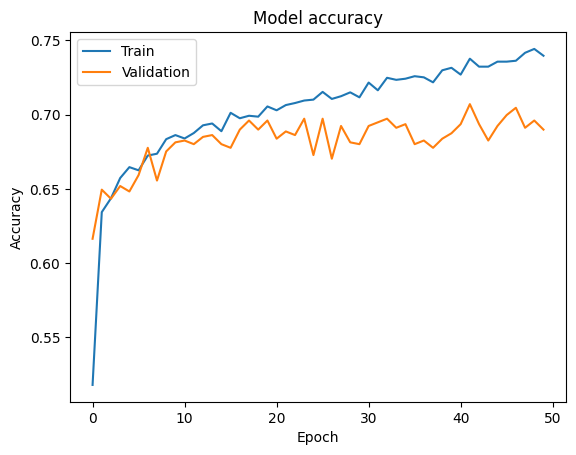

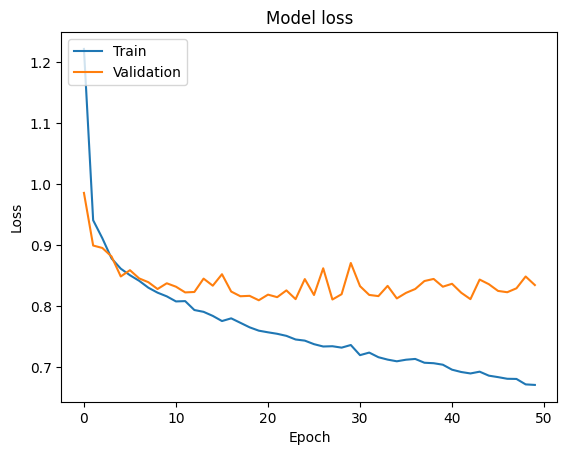

In [50]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [51]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, models

# Assuming X and y are already defined

# Split the dataset into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # Further split into train and validation

# Define the neural network model
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(np.unique(y)), activation='softmax')  # Output layer with softmax activation for multiclass classification
])

# Compile the model with custom parameters
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with validation data
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f'Test accuracy: {test_accuracy}')

# Save the model
model.save('music_genre_prediction_model.h5')

model.summary()



Epoch 1/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3644 - loss: 1.5189 - val_accuracy: 0.5328 - val_loss: 1.2055
Epoch 2/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5675 - loss: 1.1220 - val_accuracy: 0.5811 - val_loss: 1.0506
Epoch 3/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6198 - loss: 0.9806 - val_accuracy: 0.6191 - val_loss: 0.9591
Epoch 4/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6492 - loss: 0.9159 - val_accuracy: 0.6283 - val_loss: 0.9481
Epoch 5/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6463 - loss: 0.8940 - val_accuracy: 0.6430 - val_loss: 0.9145
Epoch 6/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6475 - loss: 0.8830 - val_accuracy: 0.6491 - val_loss: 0.8983
Epoch 7/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6447 - loss: 0.8723 - val_accuracy: 0.6540 - val_loss: 0.8898
Epoch 8/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6652 - loss: 0.8331 - val_accuracy: 0.6577 - v

Test accuracy: 0.683404803276062


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 128)            │         3,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,345 (138.07 KB)

 Trainable params: 11,781 (46.02 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,564 (92.05 KB)

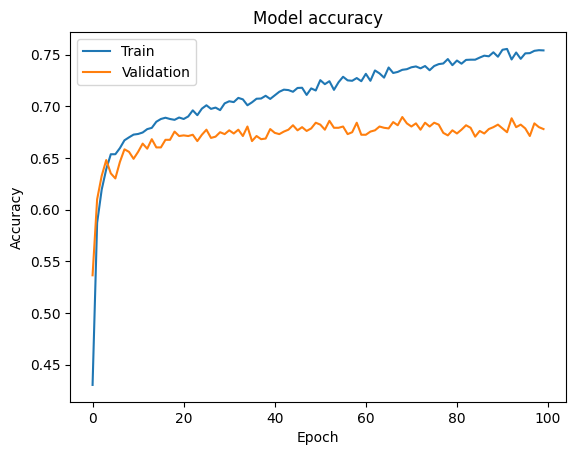

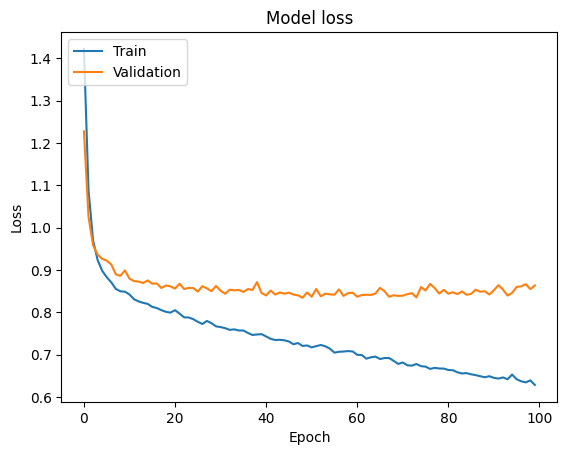

In [42]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [44]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 128)            │         3,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,345 (138.07 KB)

 Trainable params: 11,781 (46.02 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,564 (92.05 KB)

In [45]:
from sklearn.metrics import classification_report

 # Make predictions on the test set 
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

 # Print classification report
print(classification_report(y_test, y_pred_classes))


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.67      0.71      0.69       310
           1       0.86      0.67      0.75       357
           2       0.68      0.79      0.73       318
           3       0.65      0.67      0.66       341
           4       0.64      0.63      0.63       307

    accuracy                           0.69      1633
   macro avg       0.70      0.69      0.69      1633
weighted avg       0.70      0.69      0.70      1633

